In [ ]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [94]:
import seaborn as sns

In [3]:
df = pd.read_csv('Dataframe_visualisation.csv')

In [5]:
df.head()

,IncidentNumber,DateOfCall,CalYear_x,TimeOfCall,HourOfCall_x,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,...,AttendanceTimeSeconds,DateAndTimeLeft,DeployedFromStation_Code,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,PlusCode_Code,PlusCode_Description,DelayCodeId,DelayCode_Description
0,000001-01012016,2016-01-01,2016,00:03:17,0,False Alarm,False alarm - Good intent,No,Dwelling,House - single occupancy,...,165,01/01/2016 00:27:52,E25,Plumstead,Home Station,1,Initial,Initial Mobilisation,0.0,0
1,000003-01012016,2016-01-01,2016,00:04:41,0,Fire,Primary Fire,No,Dwelling,House - single occupancy,...,159,01/01/2016 00:26:14,E25,Plumstead,Home Station,1,Initial,Initial Mobilisation,0.0,0
2,000003-01012016,2016-01-01,2016,00:04:41,0,Fire,Primary Fire,No,Dwelling,House - single occupancy,...,334,01/01/2016 00:20:03,E27,Erith,Home Station,2,Initial,Initial Mobilisation,0.0,0
3,000005-01012016,2016-01-01,2016,00:07:17,0,Special Service,Special Service,RTC,Road Vehicle,Multiple Vehicles,...,272,01/01/2016 00:55:25,A32,Hornsey,Home Station,1,Initial,Initial Mobilisation,0.0,0
4,000005-01012016,2016-01-01,2016,00:07:17,0,Special Service,Special Service,RTC,Road Vehicle,Multiple Vehicles,...,368,01/01/2016 00:55:35,A31,Holloway,Home Station,2,Initial,Initial Mobilisation,0.0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1831114 entries, 0 to 1831113
Data columns (total 50 columns):
 #   Column                                  Dtype  
---  ------                                  -----  
 0   IncidentNumber                          object 
 1   DateOfCall                              object 
 2   CalYear_x                               int64  
 3   TimeOfCall                              object 
 4   HourOfCall_x                            int64  
 5   IncidentGroup                           object 
 6   StopCodeDescription                     object 
 7   SpecialServiceType                      object 
 8   PropertyCategory                        object 
 9   PropertyType                            object 
 10  AddressQualifier                        object 
 11  Postcode_district                       object 
 12  IncGeo_BoroughCode                      object 
 13  IncGeo_BoroughName                      object 
 14  ProperCase                        

In [98]:
df['DateOfCall'] = pd.to_datetime(df['DateOfCall'], yearfirst = True)

In [99]:
nombre_accidents_par_date = df['DateOfCall'].value_counts().sort_index()

In [9]:
print(nombre_accidents_par_date)

DateOfCall
2016-01-01     419
2016-01-02     285
2016-01-03     287
2016-01-04     291
2016-01-05     382
              ... 
2023-09-27    1058
2023-09-28     932
2023-09-29    1002
2023-09-30    1058
2023-10-01      80
Name: count, Length: 2831, dtype: int64


In [10]:
df_plot = pd.DataFrame({'DateOfCall': nombre_accidents_par_date.index, 'Count': nombre_accidents_par_date.values})

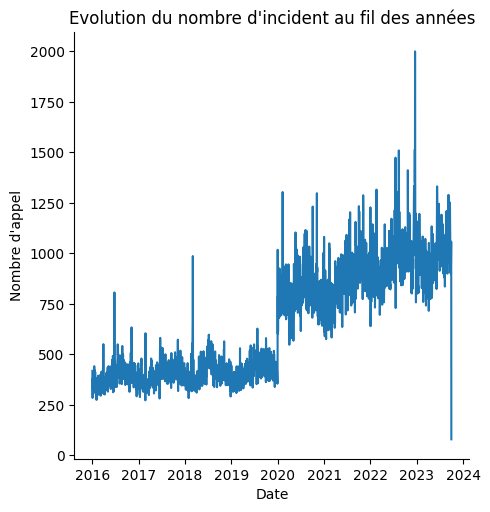

In [11]:
sns.relplot(x='DateOfCall', y='Count', data=df_plot, kind='line');
plt.xlabel("Date")
plt.ylabel("Nombre d'appel")
plt.title("Evolution du nombre d'incident au fil des années");

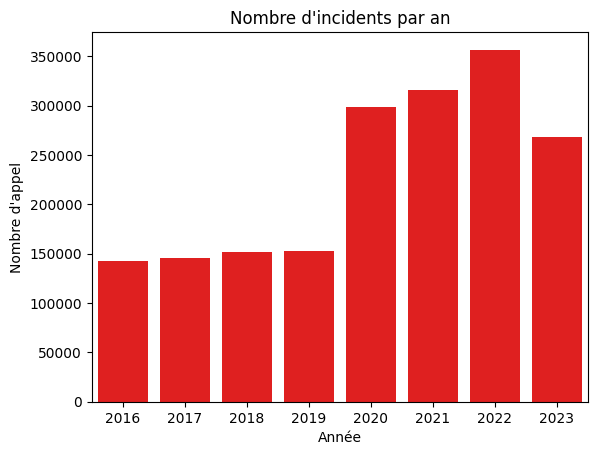

In [96]:
sns.countplot(x = df['CalYear_x'], color = "red");
plt.xlabel("Année")
plt.ylabel("Nombre d'appel")
plt.title("Nombre d'incidents par an");

In [100]:
df['Month'] = df['DateOfCall'].dt.strftime('%b')
df['DayOfWeekName'] = (df['DateOfCall'].dt.dayofweek + 5) % 7
df['DayOfWeekName'] = df['DateOfCall'].dt.strftime('%a').str[:3]

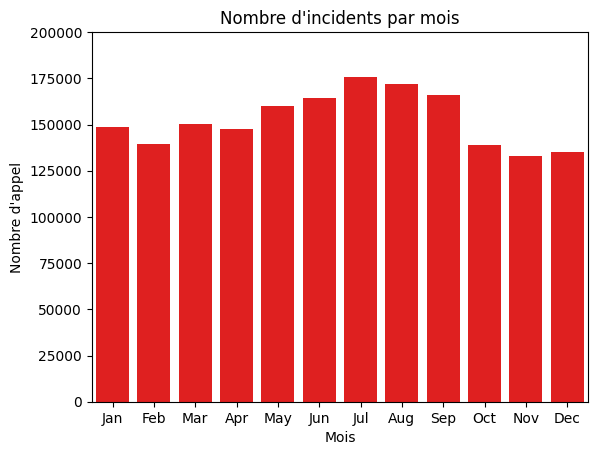

In [101]:
sns.countplot(x = df['Month'], color = "red");
plt.xlabel("Mois")
plt.ylabel("Nombre d'appel")
plt.ylim(0,200000)
plt.title("Nombre d'incidents par mois");

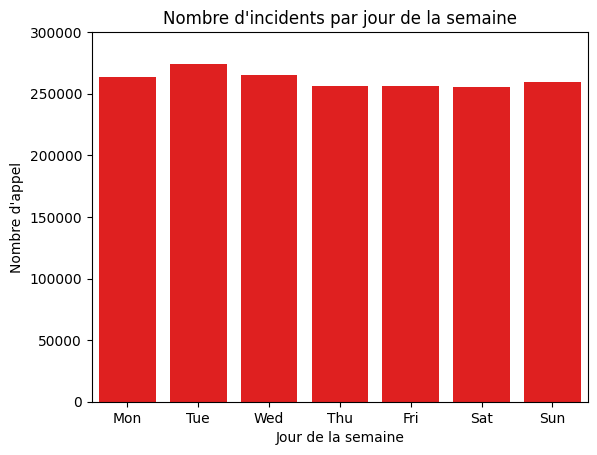

In [102]:
sns.countplot(x = df['DayOfWeekName'], color = "red");
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.xlabel("Jour de la semaine")
plt.ylabel("Nombre d'appel")
plt.ylim(0,300000)
plt.title("Nombre d'incidents par jour de la semaine");

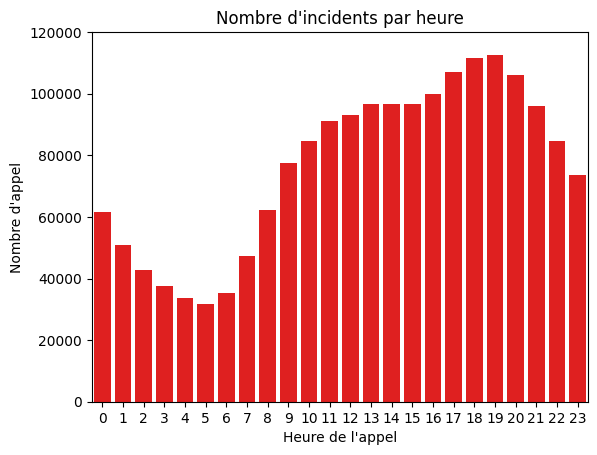

In [105]:
sns.countplot(x= df['HourOfCall_x'], color = "red");
plt.title("Nombre d'incidents par heure");
plt.xlabel("Heure de l'appel")
plt.ylabel("Nombre d'appel")
plt.ylim(0,120000);

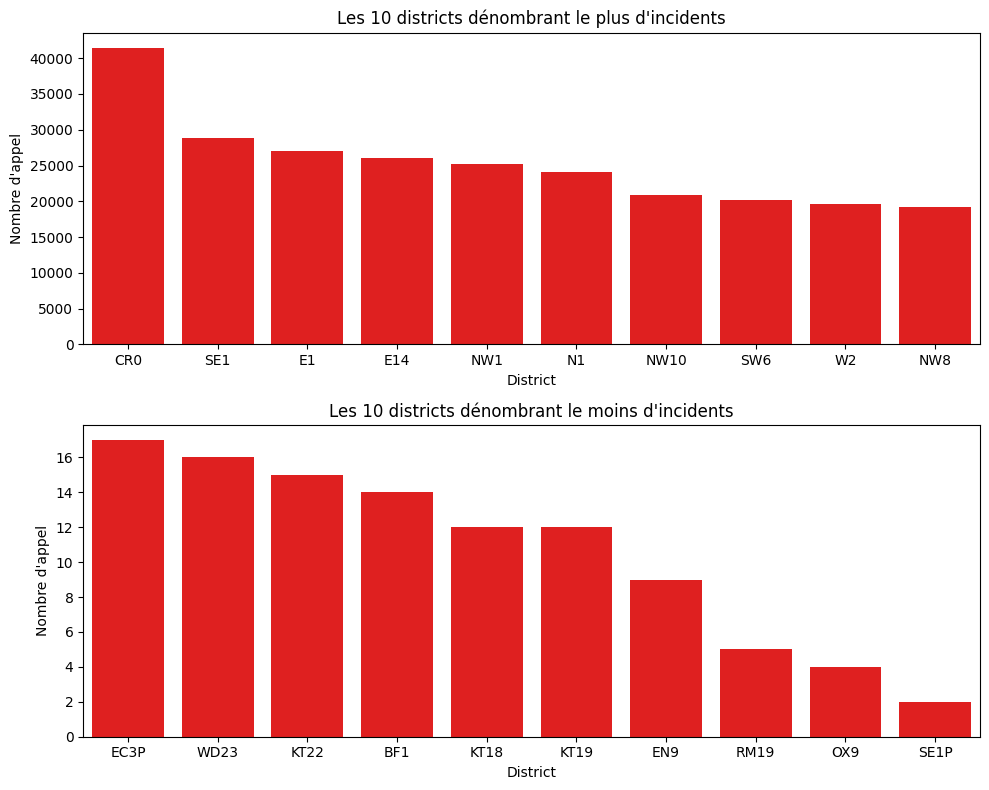

In [17]:
max_district = df['Postcode_district'].value_counts().head(10)
min_district = df['Postcode_district'].value_counts().tail(10)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

sns.barplot(x=max_district.index, y=max_district, order=max_district.index, color='red', ax = ax1)
ax1.set_title("Les 10 districts dénombrant le plus d'incidents")
ax1.set_xlabel("District")
ax1.set_ylabel("Nombre d'appel")

sns.barplot(x=min_district.index, y=min_district, order=min_district.index, color='red', ax = ax2)
ax2.set_title("Les 10 districts dénombrant le moins d'incidents")
ax2.set_xlabel("District")
ax2.set_ylabel("Nombre d'appel")

plt.tight_layout()

In [18]:
print(max_district, min_district)

Postcode_district
CR0     41461
SE1     28805
E1      26970
E14     26079
NW1     25165
N1      24132
NW10    20856
SW6     20208
W2      19624
NW8     19172
Name: count, dtype: int64 Postcode_district
EC3P    17
WD23    16
KT22    15
BF1     14
KT18    12
KT19    12
EN9      9
RM19     5
OX9      4
SE1P     2
Name: count, dtype: int64


In [19]:
import folium
import time
from selenium import webdriver

In [20]:
import os

In [21]:
# Coordonnées approximatives du centre de Londres
london_center = [51.509865, -0.118092]

# Création de la carte de Londres
london_map_head = folium.Map(location=london_center, zoom_start=11)

# Ajout des marqueurs pour chaque district avec des étiquettes
districts = {
    'CR0': [51.371, -0.097],
    'SE1': [51.500, -0.080],
    'E1': [51.517, -0.071],
    'E14': [51.501, -0.014],
    'NW1': [51.534, -0.142],
    'N1': [51.537, -0.099],
    'NW10': [51.540, -0.257],
    'SW6': [51.474, -0.201],
    'W2': [51.515, -0.175],
    'NW8': [51.532, -0.174]
}

for district, coordinates in districts.items():
    popup = folium.Popup(f'{district}', parse_html=True)
    folium.Marker(location=coordinates, popup=popup).add_to(london_map_head)

# Obtenir le répertoire du bureau (Desktop)
desktop_path = os.path.join(os.path.expanduser('~'), 'Desktop')

# Sauvegarde de la carte dans un fichier HTML
html_file_path = os.path.join(desktop_path, 'PROJET DA', 'london_districts_head.html')
london_map_head.save(html_file_path)

In [22]:
# Coordonnées approximatives du centre de Londres
london_center = [51.509865, -0.118092]

# Création de la carte de Londres
london_map_tail = folium.Map(location=london_center, zoom_start=11)

# Ajout des marqueurs pour chaque district avec des étiquettes
districts = {
    'EC3P': [51.509, -0.083],
    'WD23': [51.656, -0.381],
    'KT22': [51.298, -0.329],
    'BF1': [51.515, -0.093],
    'KT18': [51.332, -0.268],
    'KT19': [51.343, -0.261],
    'EN9': [51.693, -0.007],
    'RM19': [51.482, 0.243],
    'OX9': [51.747, -0.981],
    'SE1P': [51.500, -0.086]
}

for district, coordinates in districts.items():
    popup = folium.Popup(f'{district}', parse_html=True)
    folium.Marker(location=coordinates, popup=popup).add_to(london_map_tail)

# Obtenir le répertoire du bureau (Desktop)
desktop_path = os.path.join(os.path.expanduser('~'), 'Desktop')

# Sauvegarde de la carte dans un fichier HTML
html_file_path = os.path.join(desktop_path, 'PROJET DA', 'london_districts_tail.html')
london_map_tail.save(html_file_path)

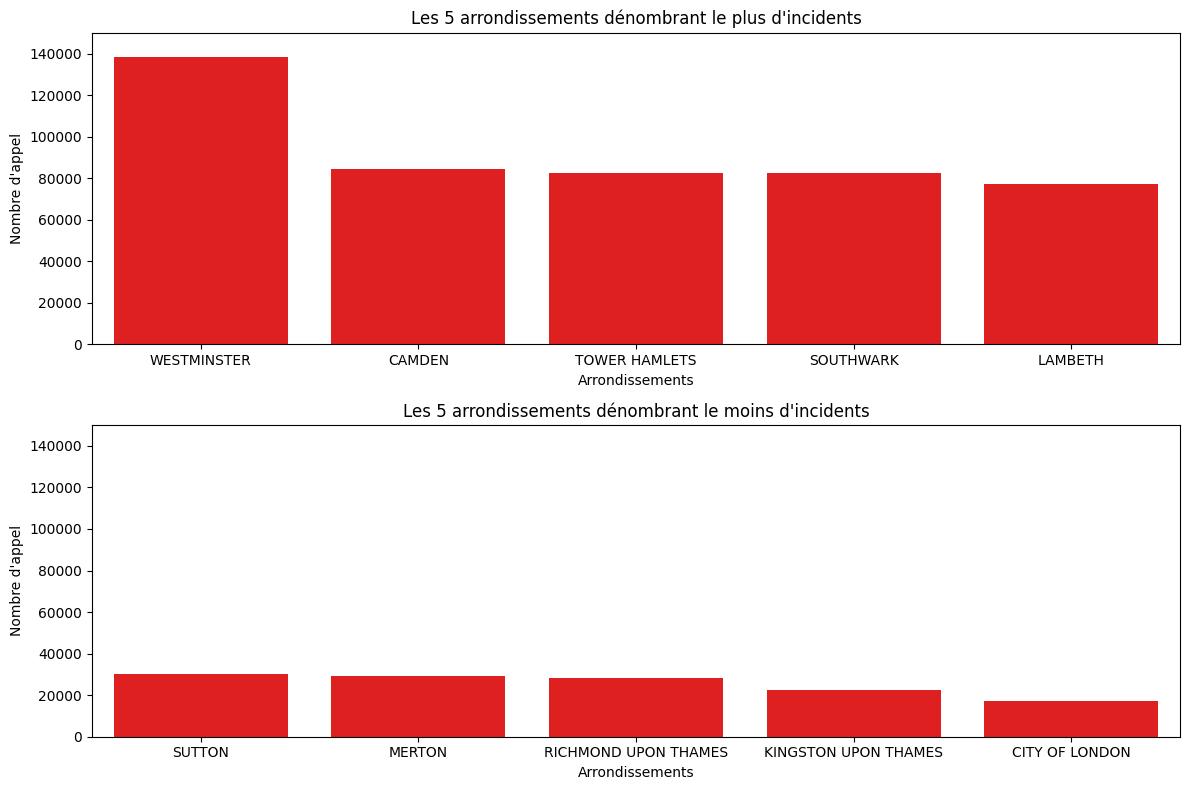

In [23]:
max_arrondissement = df['IncGeo_BoroughName'].value_counts().head(5)
min_arrondissement = df['IncGeo_BoroughName'].value_counts().tail(5)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

sns.barplot(x=max_arrondissement.index, y=max_arrondissement, order=max_arrondissement.index, color='red', ax = ax1)
ax1.set_ylim(0,150000)
ax1.set_title("Les 5 arrondissements dénombrant le plus d'incidents")
ax1.set_xlabel("Arrondissements")
ax1.set_ylabel("Nombre d'appel")

sns.barplot(x=min_arrondissement.index, y=min_arrondissement, order=min_arrondissement.index, color='red', ax = ax2)
ax2.set_ylim(0,150000)
ax2.set_title("Les 5 arrondissements dénombrant le moins d'incidents")
ax2.set_xlabel("Arrondissements")
ax2.set_ylabel("Nombre d'appel")

plt.tight_layout()

In [24]:
print (max_arrondissement, min_arrondissement)

IncGeo_BoroughName
WESTMINSTER      138277
CAMDEN            84255
TOWER HAMLETS     82613
SOUTHWARK         82320
LAMBETH           77308
Name: count, dtype: int64 IncGeo_BoroughName
SUTTON                  30323
MERTON                  29208
RICHMOND UPON THAMES    28362
KINGSTON UPON THAMES    22627
CITY OF LONDON          16957
Name: count, dtype: int64


In [25]:
# Coordonnées approximatives du centre de Londres
london_center = [51.509865, -0.118092]

# Création de la carte de Londres
london_map_boroughs_head = folium.Map(location=london_center, zoom_start=11)

# Ajout des marqueurs pour chaque arrondissement avec des étiquettes
boroughs = {
    'WESTMINSTER': [51.4975, -0.1357],
    'CAMDEN': [51.5290, -0.1255],
    'TOWER HAMLETS': [51.5099, -0.0059],
    'SOUTHWARK': [51.5035, -0.0804],
    'LAMBETH': [51.5013, -0.1173]
}

for borough, coordinates in boroughs.items():
    popup = folium.Popup(f'{borough}', parse_html=True)
    folium.Marker(location=coordinates, popup=popup, icon=folium.Icon(color='green')).add_to(london_map_boroughs_head)

# Obtenir le répertoire du bureau (Desktop)
desktop_path = os.path.join(os.path.expanduser('~'), 'Desktop')

# Sauvegarde de la carte dans un fichier HTML
html_file_path_boroughs = os.path.join(desktop_path, 'PROJET DA', 'london_boroughs_head.html')
london_map_boroughs_head.save(html_file_path_boroughs)

In [26]:
# Coordonnées approximatives du centre de Londres
london_center = [51.509865, -0.118092]

# Création de la carte de Londres
london_map_boroughs_tail = folium.Map(location=london_center, zoom_start=11)

# Ajout des marqueurs pour chaque arrondissement avec des étiquettes
boroughs = {
    'SUTTON': [51.3574, -0.1736],
    'MERTON': [51.4109, -0.1881],
    'RICHMOND UPON THAMES': [51.4479, -0.3260],
    'KINGSTON UPON THAMES': [51.4096, -0.3063],
    'CITY OF LONDON': [51.5156, -0.0922]
}

for borough, coordinates in boroughs.items():
    popup = folium.Popup(f'{borough}', parse_html=True)
    folium.Marker(location=coordinates, popup=popup, icon=folium.Icon(color='green')).add_to(london_map_boroughs_tail)

# Obtenir le répertoire du bureau (Desktop)
desktop_path = os.path.join(os.path.expanduser('~'), 'Desktop')

# Sauvegarde de la carte dans un fichier HTML
html_file_path_boroughs = os.path.join(desktop_path, 'PROJET DA', 'london_boroughs_tail.html')
london_map_boroughs_tail.save(html_file_path_boroughs)

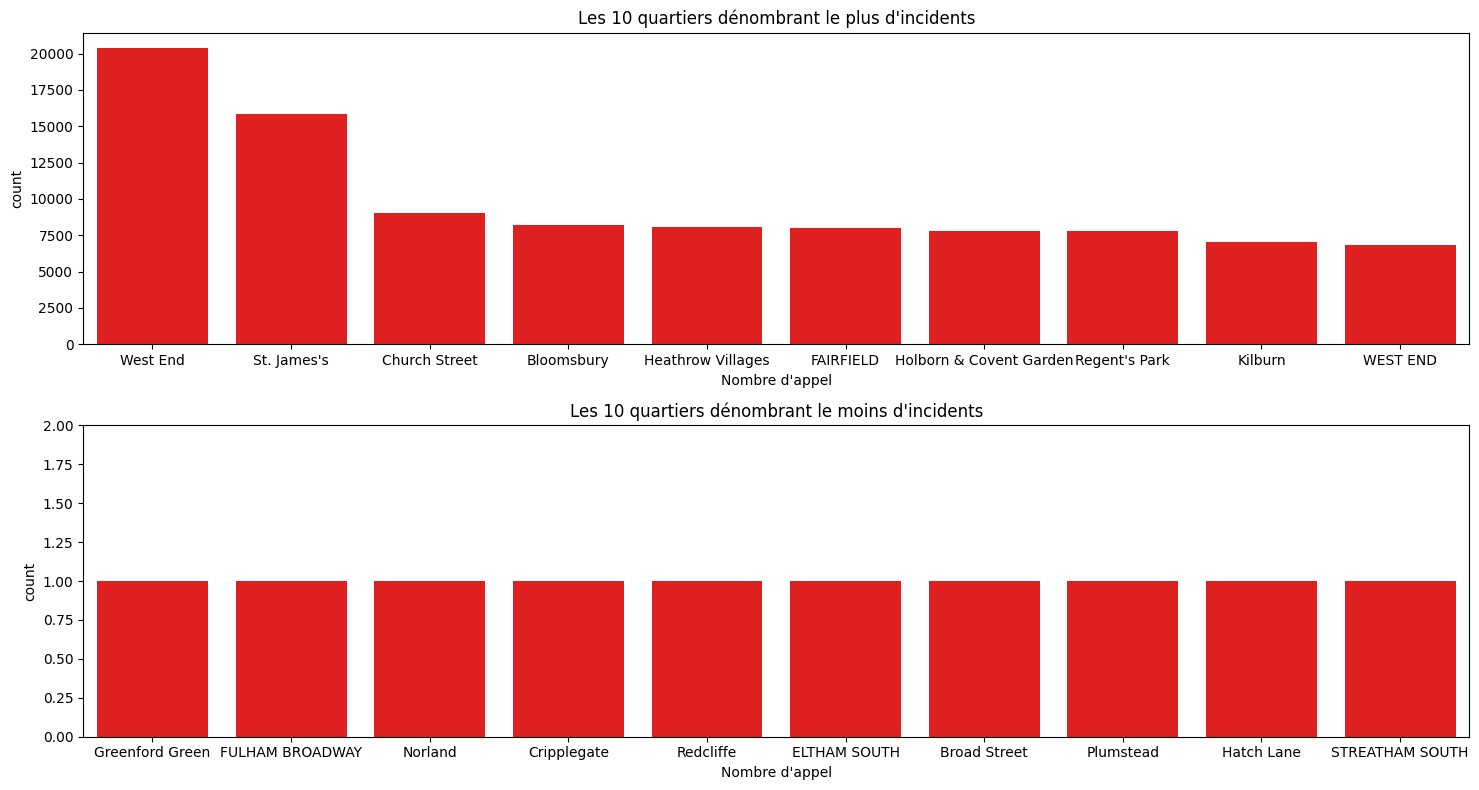

In [27]:
max_quartier = df['IncGeo_WardName'].value_counts().head(10)
min_quartier = df['IncGeo_WardName'].value_counts().tail(10)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 8))

sns.barplot(x=max_quartier.index, y=max_quartier, order=max_quartier.index, color='red', ax = ax1)
ax1.set_title("Les 10 quartiers dénombrant le plus d'incidents")
ax1.set_xlabel("Quartiers")
ax1.set_xlabel("Nombre d'appel")

sns.barplot(x=min_quartier.index, y=min_quartier, order=min_quartier.index, color='red', ax = ax2)
plt.ylim(0,2)
ax2.set_title("Les 10 quartiers dénombrant le moins d'incidents")
ax2.set_xlabel("Quartiers")
ax2.set_xlabel("Nombre d'appel")

plt.tight_layout()

In [28]:
print(max_quartier, min_quartier)

IncGeo_WardName
West End                   20414
St. James's                15869
Church Street               9055
Bloomsbury                  8200
Heathrow Villages           8086
FAIRFIELD                   7969
Holborn & Covent Garden     7796
Regent's Park               7772
Kilburn                     7020
WEST END                    6864
Name: count, dtype: int64 IncGeo_WardName
Greenford Green    1
FULHAM BROADWAY    1
Norland            1
Cripplegate        1
Redcliffe          1
ELTHAM SOUTH       1
Broad Street       1
Plumstead          1
Hatch Lane         1
STREATHAM SOUTH    1
Name: count, dtype: int64


In [29]:
from folium import plugins

In [30]:
# 1. Obtenir toutes les valeurs uniques de la colonne 'IncGeo_BoroughName'
valeurs_uniques = df['IncGeo_BoroughName'].unique()

# 2. Compter et classer les valeurs dans l'ordre décroissant
comptes_valeurs = df['IncGeo_BoroughName'].value_counts().sort_values(ascending=False)

# 3. Séparer les valeurs en groupes
groupes_valeurs = df.groupby('IncGeo_BoroughName')

# Affichage des résultats
print("1. Toutes les valeurs uniques :\n", valeurs_uniques)
print("\n2. Comptes classés dans l'ordre décroissant :\n", comptes_valeurs)
print("\n3. Groupes de valeurs :\n", groupes_valeurs)

1. Toutes les valeurs uniques :
 ['GREENWICH' 'HARINGEY' 'LEWISHAM' 'TOWER HAMLETS' 'LAMBETH' 'EALING'
 'NEWHAM' 'ENFIELD' 'HILLINGDON' 'MERTON' 'CITY OF LONDON' 'SOUTHWARK'
 'WESTMINSTER' 'BRENT' 'SUTTON' 'ISLINGTON' 'HAVERING' 'HOUNSLOW' 'CAMDEN'
 'WANDSWORTH' 'KENSINGTON AND CHELSEA' 'BROMLEY' 'WALTHAM FOREST'
 'RICHMOND UPON THAMES' 'BARNET' 'HARROW' 'KINGSTON UPON THAMES' 'HACKNEY'
 'BARKING AND DAGENHAM' 'REDBRIDGE' 'CROYDON' 'HAMMERSMITH AND FULHAM'
 'BEXLEY']

2. Comptes classés dans l'ordre décroissant :
 IncGeo_BoroughName
WESTMINSTER               138277
CAMDEN                     84255
TOWER HAMLETS              82613
SOUTHWARK                  82320
LAMBETH                    77308
CROYDON                    76939
HACKNEY                    72614
LEWISHAM                   69370
BARNET                     64645
KENSINGTON AND CHELSEA     63027
EALING                     60558
WANDSWORTH                 59972
NEWHAM                     59917
ISLINGTON                  59295

In [31]:
# 1. Obtenir toutes les valeurs uniques de la colonne 'IncGeo_BoroughName'
valeurs_uniques = df['IncGeo_WardName'].unique()

# 2. Compter et classer les valeurs dans l'ordre décroissant
comptes_valeurs = df['IncGeo_WardName'].value_counts().sort_values(ascending=False)

# Affichage des résultats
print("1. Toutes les valeurs uniques :\n", valeurs_uniques)
print("\n2. Comptes classés dans l'ordre décroissant :\n", comptes_valeurs)

1. Toutes les valeurs uniques :
 ['Plumstead Common' 'Harringay' 'Evelyn' ... 'WORCESTER PARK SOUTH'
 'COOMBE VALE' 'HOUNSLOW SOUTH']

2. Comptes classés dans l'ordre décroissant :
 IncGeo_WardName
West End             20414
St. James's          15869
Church Street         9055
Bloomsbury            8200
Heathrow Villages     8086
                     ...  
Greenford Green          1
Prince's                 1
Queenhithe               1
Colville                 1
STREATHAM SOUTH          1
Name: count, Length: 1401, dtype: int64


In [48]:
# Coordonnées approximatives du centre de Londres
centre_londres = [51.509865, -0.118092]

# Création de la carte de Londres
carte_londres = folium.Map(location=centre_londres, zoom_start=11)

# Ajout de la couche choroplèthe à partir du fichier GeoJSON
geojson_path = "london_boroughs.json" 
# Quartiers à mettre en surbrillance en rouge
quartiers_rouges = ['Westminster', 'Camden', 'Tower Hamlets', 'Southwark', 'Lambeth', 'Croydon', 'Hackney']
quartiers_oranges = ['Lewisham', 'Barnet', 'Kensington and Chelsea', 'Ealing', 'Newham', 'Wandsworth', 'Islington', 'Brent', 'Hillingdon', 'Hammersmith and Fulham', 'Greenwich', 'Haringey', 'Enfield', 'Bromley', 'Hounslow', 'Waltham Forest', 'Redbridge']
quartiers_jaunes = ['Barking and Dagenham', 'Bexley', 'Havering', 'Harrow', 'Sutton', 'Merton', 'Richmond upon Thames', 'Kingston upon Thames', 'City of London']


# Ajout de la couche choroplèthe à partir du fichier GeoJSON
folium.GeoJson(
    geojson_path,
    name='participation',
    style_function=lambda feature: {
        'fillColor': '#FF0000' if feature['properties']['name'] in quartiers_rouges else ('#FFCCCC' if feature['properties']['name'] in quartiers_oranges else ('#FFDE75' if feature['properties']['name'] in quartiers_jaunes else 'Y1GnBu')),
        'fillOpacity': 0.3 if feature['properties']['name'] in quartiers_rouges else 0.7,
        'color': 'black',
        'weight': 1,
        'dashArray': '5, 5'
    }
).add_to(carte_londres)

districts_tail = {
    'EC3P': [51.509, -0.083],
    'WD23': [51.656, -0.381],
    'KT22': [51.298, -0.329],
    'BF1': [51.515, -0.093],
    'KT18': [51.332, -0.268],
    'KT19': [51.343, -0.261],
    'EN9': [51.693, -0.007],
    'RM19': [51.482, 0.243],
    'OX9': [51.747, -0.981],
    'SE1P': [51.500, -0.086]
}

districts_head = {
    'CR0': [51.371, -0.097],
    'SE1': [51.500, -0.080],
    'E1': [51.517, -0.071],
    'E14': [51.501, -0.014],
    'NW1': [51.534, -0.142],
    'N1': [51.537, -0.099],
    'NW10': [51.540, -0.257],
    'SW6': [51.474, -0.201],
    'W2': [51.515, -0.175],
    'NW8': [51.532, -0.174]
}

# Ajout des marqueurs pour chaque district avec des étiquettes et des icônes FontAwesome
for district, coordinates in districts_head.items():
    popup = folium.Popup(f'{district}', parse_html=True)
    icon = folium.Icon(color='darkred', icon='building', prefix='fa')
    folium.Marker(location=coordinates, popup=popup, icon=icon).add_to(carte_londres)

for district, coordinates in districts_tail.items():
    popup = folium.Popup(f'{district}', parse_html=True)
    icon = folium.Icon(color='beige', icon='building', prefix='fa')
    folium.Marker(location=coordinates, popup=popup, icon=icon).add_to(carte_londres)

quarters_head = {
    'West End': [51.5119, -0.1352],
    "St. James's": [51.5074, -0.1319],
    'Church Street': [51.5237, -0.1663],
    'Bloomsbury': [51.5202, -0.1232],
    'Heathrow Villages': [51.4695, -0.4870],
    'FAIRFIELD': [51.4014, -0.0976],
    'Holborn & Covent Garden': [51.5156, -0.1204],
    "Regent's Park": [51.5312, -0.1569],
    'Kilburn': [51.5413, -0.2046],
    'WEST END': [51.5125, -0.1355]}

quarters_tail = {
    'Norland': [51.5014, -0.2183],
    'STREATHAM SOUTH': [51.4264, -0.1293],
    'Queenhithe': [51.5098, -0.0966],
    'Greenford Green': [51.5283, -0.3247],
    'Broad Street': [51.5174, -0.0874],
    'FULHAM BROADWAY': [51.4804, -0.1957],
    'Hatch Lane': [51.5938, 0.0142],
    'Plumstead': [51.4864, 0.0995],
    'Colville': [51.5154, -0.2067],
    'ELTHAM SOUTH': [51.4424, 0.0473]}

# Ajout des marqueurs pour chaque quartier avec des étiquettes et des icônes FontAwesome
for quarter, coordinates in quarters_head.items():
    popup = folium.Popup(f'{quarter}', parse_html=True)
    icon = folium.Icon(color='darkred', icon='home', prefix='fa')
    folium.Marker(location=coordinates, popup=popup, icon=icon).add_to(carte_londres)

for quarter, coordinates in quarters_tail.items():
    popup = folium.Popup(f'{quarter}', parse_html=True)
    icon = folium.Icon(color='beige', icon='home', prefix='fa')
    folium.Marker(location=coordinates, popup=popup, icon=icon).add_to(carte_londres)


# Ajout de la couche de contrôle des couches (Layers Control)
folium.LayerControl().add_to(carte_londres)

# Ajout de la légende au coin supérieur gauche
legend_html = """
     <div style="position: fixed; 
                 bottom: 50px; left: 50px; 
                 background-color: white; border:2px solid grey; z-index:9999; font-size:14px;text-align:left;
                 "><br>
                   &nbsp; &nbsp;   Rouge : arrondissement dénombrant le plus d'incidents  &nbsp; &nbsp;  <br>
                   &nbsp; &nbsp;   Rose : arrondissement dénombrant de nombreux incidents   &nbsp; &nbsp; <br>
                   &nbsp; &nbsp;   Jaune : arrondissement dénombrant le moins d'incidents  &nbsp; &nbsp;  <br>
                   <br>
                   &nbsp; &nbsp; <i class="fa fa-building fa-2x" style="color: darkred"></i> <i class="fa fa-building fa-2x" style="color: beige"></i> Districts dénombrant le plus / le moins d'incidents &nbsp; <br>
                   <br>
                   &nbsp; &nbsp; <i class="fa fa-home fa-2x" style="color: darkred"></i> <i class="fa fa-home fa-2x" style="color: beige"></i> Quartiers dénombrant le plus / le moins d'incidents &nbsp; <br>
                   <br>
     </div>
     """

carte_londres.get_root().html.add_child(folium.Element(legend_html))

# Enregistrement de la carte dans un fichier HTML
html_file_path_boroughs = os.path.join(desktop_path, 'PROJET DA', 'carte_londres.html')
carte_londres.save(html_file_path_boroughs)

# Affichage de la carte
carte_londres

        IncGeo_BoroughName  AverageResponseTime  IncidentCount Category
16              HILLINGDON             6.890933          55506     Rose
15                HAVERING             6.533142          35541    Jaune
9                  ENFIELD             6.514078          52684     Rose
4                  BROMLEY             6.467665          49164     Rose
1                   BARNET             6.399579          64645     Rose
3                    BRENT             6.335906          57125     Rose
14                  HARROW             6.334762          31056    Jaune
25               REDBRIDGE             6.329279          40446     Rose
2                   BEXLEY             6.268763          35719    Jaune
0     BARKING AND DAGENHAM             6.212238          35854    Jaune
26    RICHMOND UPON THAMES             6.186310          28362    Jaune
17                HOUNSLOW             6.175317          47716     Rose
20    KINGSTON UPON THAMES             6.168509          22627  

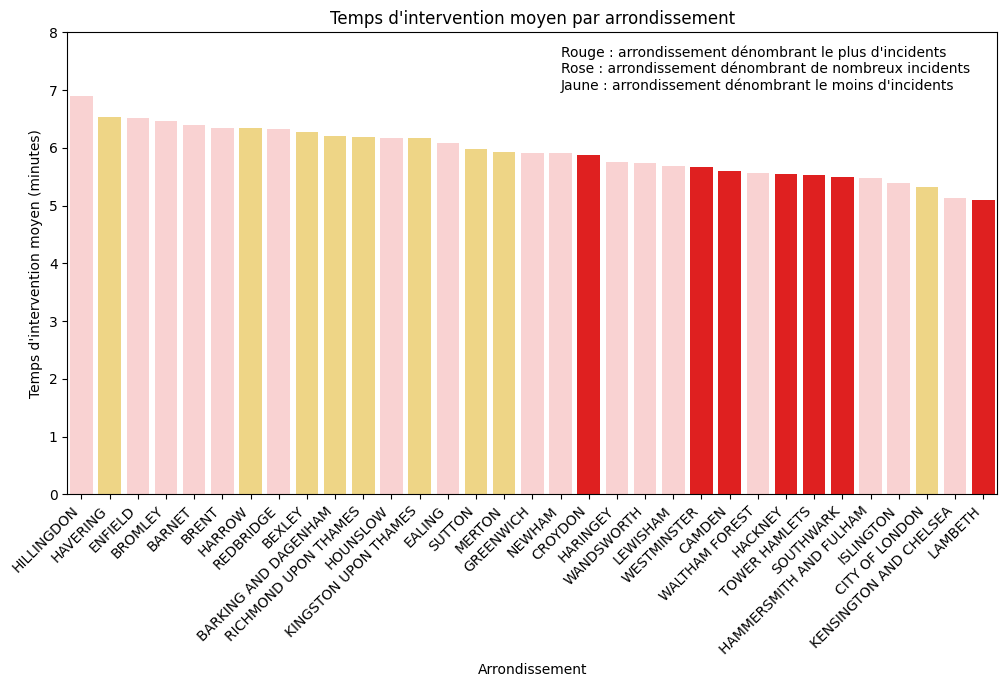

In [49]:
# Conversion de la colonne de temps d'intervention en minutes (si elle est en secondes)
df['AttendanceTimeMinutes'] = df['AttendanceTimeSeconds'] / 60.0

# Calcul du temps d'intervention moyen par borough
average_response_time_by_borough = df.groupby('IncGeo_BoroughName')['AttendanceTimeMinutes'].mean()

# Nombre d'incidents par borough
incident_counts_by_borough = df['IncGeo_BoroughName'].value_counts()

# Fusion des données pour avoir une seule DataFrame avec le temps d'intervention moyen et le nombre d'incidents par borough
result_df = pd.DataFrame({'AverageResponseTime': average_response_time_by_borough, 'IncidentCount': incident_counts_by_borough}).reset_index()

# Trier le DataFrame par AverageResponseTime pour déterminer l'ordre des boroughs
result_df = result_df.sort_values(by='AverageResponseTime', ascending=False)

# Catégoriser les quartiers en rouge, orange et jaune
quartiers_rouges = ['Westminster', 'Camden', 'Tower Hamlets', 'Southwark', 'Lambeth', 'Croydon', 'Hackney']
quartiers_oranges = ['Lewisham', 'Barnet', 'Kensington and Chelsea', 'Ealing', 'Newham', 'Wandsworth', 'Islington', 'Brent', 'Hillingdon', 'Hammersmith and Fulham', 'Greenwich', 'Haringey', 'Enfield', 'Bromley', 'Hounslow', 'Waltham Forest', 'Redbridge']
quartiers_jaunes = ['Barking and Dagenham', 'Bexley', 'Havering', 'Harrow', 'Sutton', 'Merton', 'Richmond upon Thames', 'Kingston upon Thames', 'City of London']

# Catégoriser les boroughs en fonction des quartiers rouges, oranges et jaunes
result_df['Category'] = 'Inconnu'
result_df.loc[result_df['IncGeo_BoroughName'].str.capitalize().isin(map(str.capitalize, quartiers_rouges)), 'Category'] = 'Rouge'
result_df.loc[result_df['IncGeo_BoroughName'].str.capitalize().isin(map(str.capitalize, quartiers_oranges)), 'Category'] = 'Rose'
result_df.loc[result_df['IncGeo_BoroughName'].str.capitalize().isin(map(str.capitalize, quartiers_jaunes)), 'Category'] = 'Jaune'
print(result_df)

# Création du barplot avec coloration en fonction de la catégorie de couleur
plt.figure(figsize=(12, 6))
sns.barplot(x='IncGeo_BoroughName', y='AverageResponseTime', data=result_df, hue='Category', palette={'Rouge': '#FF0000', 'Rose': '#FFCCCC', 'Jaune': '#FFDE75', 'Inconnu': 'grey'}, legend= False)
plt.title('Temps d\'intervention moyen par arrondissement')
plt.xlabel('Arrondissement')
plt.ylabel('Temps d\'intervention moyen (minutes)')
plt.xticks(rotation=45, ha='right')
plt.ylim(0,8)


# Ajout du texte en tant que légende personnalisée
legend_text = "Rouge : arrondissement dénombrant le plus d'incidents\n" \
              "Rose : arrondissement dénombrant de nombreux incidents\n" \
              "Jaune : arrondissement dénombrant le moins d'incidents"

plt.text(17, 7, legend_text, fontsize=10)
plt.show()

        IncGeo_BoroughName  AverageTravelResponseTime  IncidentCount Category
16              HILLINGDON                   5.647072          55506     Rose
15                HAVERING                   5.329231          35541    Jaune
9                  ENFIELD                   5.239327          52684     Rose
1                   BARNET                   5.169295          64645     Rose
14                  HARROW                   5.166619          31056    Jaune
25               REDBRIDGE                   5.132698          40446     Rose
4                  BROMLEY                   5.116488          49164     Rose
3                    BRENT                   5.076933          57125     Rose
2                   BEXLEY                   5.048891          35719    Jaune
20    KINGSTON UPON THAMES                   5.000380          22627    Jaune
26    RICHMOND UPON THAMES                   4.959160          28362    Jaune
0     BARKING AND DAGENHAM                   4.906787          3

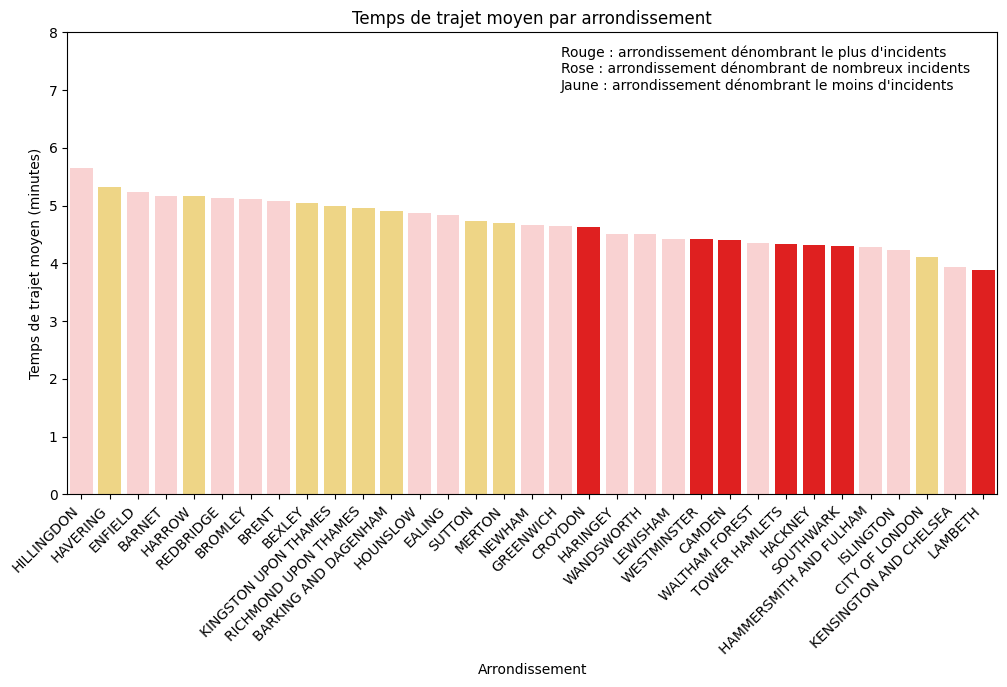

In [50]:
# Conversion de la colonne de temps d'intervention en minutes (si elle est en secondes)
df['TravelTimeMinutes'] = df['TravelTimeSeconds'] / 60.0

# Calcul du temps d'intervention moyen par borough
average_travel_response_time_by_borough = df.groupby('IncGeo_BoroughName')['TravelTimeMinutes'].mean()

# Nombre d'incidents par borough
incident_counts_by_borough = df['IncGeo_BoroughName'].value_counts()

# Fusion des données pour avoir une seule DataFrame avec le temps d'intervention moyen et le nombre d'incidents par borough
result_df = pd.DataFrame({'AverageTravelResponseTime': average_travel_response_time_by_borough, 'IncidentCount': incident_counts_by_borough}).reset_index()

# Trier le DataFrame par AverageResponseTime pour déterminer l'ordre des boroughs
result_df = result_df.sort_values(by='AverageTravelResponseTime', ascending=False)

# Catégoriser les quartiers en rouge, orange et jaune
quartiers_rouges = ['Westminster', 'Camden', 'Tower Hamlets', 'Southwark', 'Lambeth', 'Croydon', 'Hackney']
quartiers_oranges = ['Lewisham', 'Barnet', 'Kensington and Chelsea', 'Ealing', 'Newham', 'Wandsworth', 'Islington', 'Brent', 'Hillingdon', 'Hammersmith and Fulham', 'Greenwich', 'Haringey', 'Enfield', 'Bromley', 'Hounslow', 'Waltham Forest', 'Redbridge']
quartiers_jaunes = ['Barking and Dagenham', 'Bexley', 'Havering', 'Harrow', 'Sutton', 'Merton', 'Richmond upon Thames', 'Kingston upon Thames', 'City of London']

# Catégoriser les boroughs en fonction des quartiers rouges, oranges et jaunes
result_df['Category'] = 'Inconnu'
result_df.loc[result_df['IncGeo_BoroughName'].str.capitalize().isin(map(str.capitalize, quartiers_rouges)), 'Category'] = 'Rouge'
result_df.loc[result_df['IncGeo_BoroughName'].str.capitalize().isin(map(str.capitalize, quartiers_oranges)), 'Category'] = 'Rose'
result_df.loc[result_df['IncGeo_BoroughName'].str.capitalize().isin(map(str.capitalize, quartiers_jaunes)), 'Category'] = 'Jaune'
print(result_df)

# Création du barplot avec coloration en fonction de la catégorie de couleur
plt.figure(figsize=(12, 6))
sns.barplot(x='IncGeo_BoroughName', y='AverageTravelResponseTime', data=result_df, hue='Category', palette={'Rouge': '#FF0000', 'Rose': '#FFCCCC', 'Jaune': '#FFDE75', 'Inconnu': 'grey'}, legend= False)
plt.title('Temps de trajet moyen par arrondissement')
plt.xlabel('Arrondissement')
plt.ylabel('Temps de trajet moyen (minutes)')
plt.xticks(rotation=45, ha='right')
plt.ylim(0,8)


# Ajout du texte en tant que légende personnalisée
legend_text = "Rouge : arrondissement dénombrant le plus d'incidents\n" \
              "Rose : arrondissement dénombrant de nombreux incidents\n" \
              "Jaune : arrondissement dénombrant le moins d'incidents"

plt.text(17, 7, legend_text, fontsize=10)
plt.show()

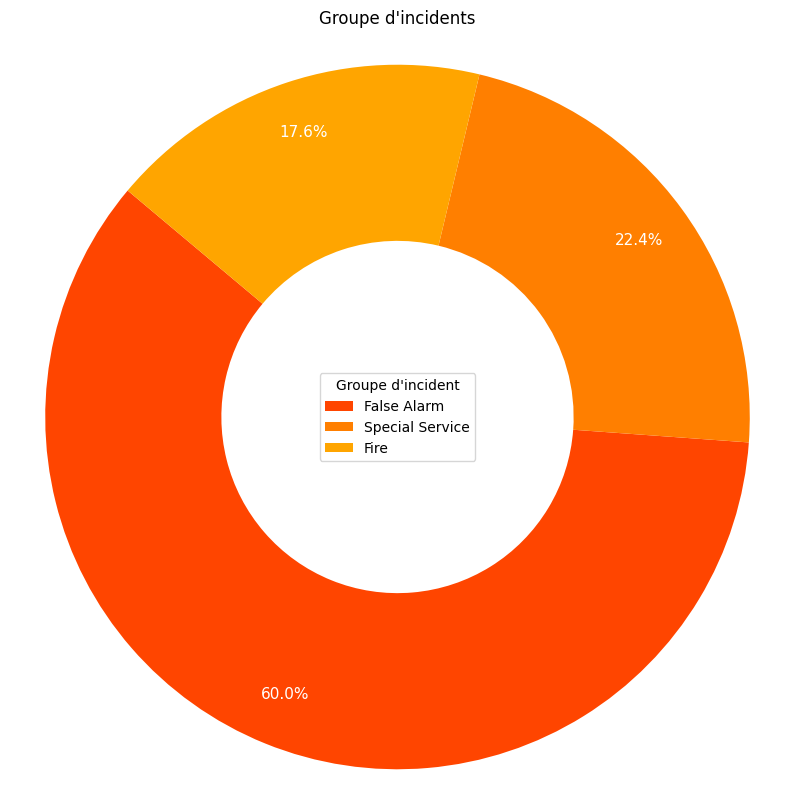

In [124]:
incident_group_pourcentages = df['IncidentGroup'].value_counts(normalize=True) * 100
colors = [ '#FF4500', '#FF7F00', '#FFA500']

plt.figure(figsize=(10, 10))
wedges, _, autotexts = plt.pie(incident_group_pourcentages, startangle=140, wedgeprops=dict(width=0.5), colors=colors, pctdistance=0.85, autopct=my_autopct,
                               textprops={'color': 'white', 'fontsize': 11})
plt.axis('equal')
plt.title("Groupe d'incidents")

plt.legend(wedges, incident_group_pourcentages.index, title="Groupe d'incident", loc="center");

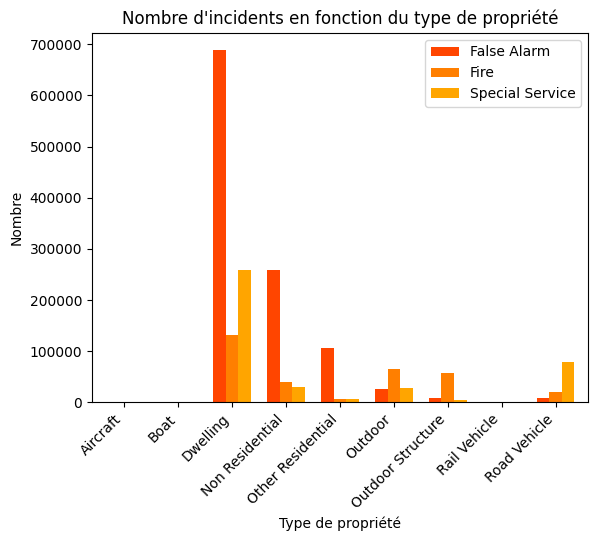

In [127]:
pivot_table = pd.crosstab(df['PropertyCategory'], df['IncidentGroup'])

colors = [ '#FF4500', '#FF7F00', '#FFA500']

pivot_table.plot(kind = 'bar', color = colors, width = 0.7)

plt.ylabel('Nombre')
plt.xlabel('Type de propriété')

plt.legend(loc='upper right')
plt.title("Nombre d'incidents en fonction du type de propriété")
plt.xticks(rotation=45, ha='right')

plt.show()

In [8]:
pivot_table

IncidentGroup,False Alarm,Fire,Special Service
PropertyCategory,,,
Aircraft,620,83,953
Boat,406,418,617
Dwelling,687817,130771,259397
Non Residential,258060,39714,29626
Other Residential,106838,6865,7626
Outdoor,26395,65837,27685
Outdoor Structure,8153,57447,5344
Rail Vehicle,510,426,1139
Road Vehicle,9142,21222,78003


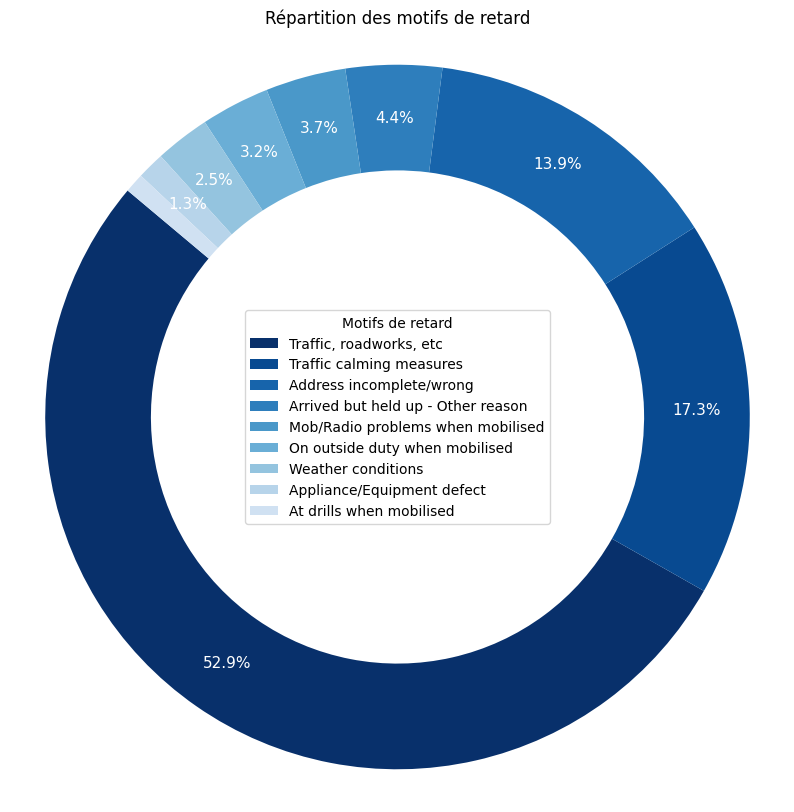

In [75]:
delay_counts = df['DelayCode_Description'].value_counts()
delay_counts = delay_counts[delay_counts.index != "0"]
delay_counts = delay_counts[delay_counts.index != "Not held up"]

# Créer une palette de couleurs bleues
num_colors = len(delay_counts)
blue_palette = plt.cm.Blues(np.linspace(1, 0.2, num_colors))

# Définir une fonction pour la personnalisation du texte d'autopct
def my_autopct(pct):
    return '{:.1f}%'.format(pct) if pct >= 1 else ''

# Créer un graphique en camembert avec des tranches espacées, une colormap bleue
plt.figure(figsize=(10, 10))
wedges, _, autotexts = plt.pie(delay_counts, startangle=140, wedgeprops=dict(width=0.3), colors=blue_palette, pctdistance=0.85, autopct=my_autopct,
                               textprops={'color': 'white', 'fontsize': 11})
plt.axis('equal')  # Assurer que le camembert est dessiné en cercle
plt.title('Répartition des motifs de retard')

# Déplacer la légende à l'intérieur du graphique
plt.legend(wedges, delay_counts.index, title="Motifs de retard", loc="center")

plt.show()

In [42]:
delay_counts

DelayCode_Description
0                                     1400034
Not held up                            256667
Traffic, roadworks, etc                 92255
Traffic calming measures                30111
Address incomplete/wrong                24262
Arrived but held up - Other reason       7697
Mob/Radio problems when mobilised        6428
On outside duty when mobilised           5504
Weather conditions                       4396
Appliance/Equipment defect               2192
At drills when mobilised                 1568
Name: count, dtype: int64

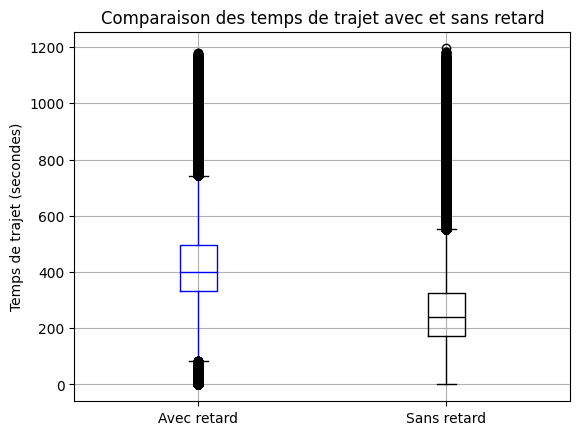

In [87]:
# Filtrer les données pour exclure les situations sans retard
df['DelayCode_Description'].replace("0", "Not held up", inplace=True)
df_with_delay = df[df['DelayCode_Description'] != "Not held up"]

# Créer le diagramme en boîte pour les temps de trajet sans retard
boxprops_without_delay = dict(color='black')  
medianprops_without_delay = dict(color='black') 
plt.boxplot(df[df['DelayCode_Description'] == "Not held up"]['TravelTimeSeconds'], positions=[2], labels=['Sans retard'], boxprops=boxprops_without_delay, medianprops=medianprops_without_delay)

# Créer le diagramme en boîte pour les temps de trajet avec retard
boxprops_with_delay = dict(color='blue')  
whiskerprops_with_delay = dict(color='blue')  
medianprops_with_delay = dict(color='blue') 
plt.boxplot(df_with_delay['TravelTimeSeconds'], positions=[1], labels=['Avec retard'], boxprops=boxprops_with_delay, whiskerprops=whiskerprops_with_delay, medianprops=medianprops_with_delay)

plt.ylabel('Temps de trajet (secondes)')
plt.title('Comparaison des temps de trajet avec et sans retard')
plt.grid(True)
plt.show()

In [90]:
median_with_delay = np.median(df_with_delay['TravelTimeSeconds'])
print(median_with_delay)

399.0


In [92]:
df_without_delay = df[df['DelayCode_Description'] == "Not held up"]
median_without_delay = np.median(df_without_delay['TravelTimeSeconds'])
print(median_without_delay)

240.0
